In [24]:
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [25]:
file_path = '../eval_out/no-ft-results.txt'
num = np.zeros(0, str)
tifi = np.zeros((0, 4), str)
opti = np.zeros((0, 4), str)
removed = np.zeros(0, str)
with open(file_path) as file:
    lines = file.readlines()
    for i in range(0, len(lines), 4):
        num = np.append(num, re.findall(r'\b\d+\_\d+\b', lines[i]))
        tmp = re.findall(r'\[\d+(?:, \d+)*\]', lines[i])
        removed = np.append(removed, [s.replace(',', ' ') for s in tmp])
        a = re.findall(r'\b\d+\.\d+\b', lines[i+1])
        tifi = np.append(tifi, np.array(a).reshape((1, 4)), axis=0)
        opti = np.append(opti, np.array(re.findall(r'\b\d+\.\d+\b', lines[i+2])).reshape((1, 4)), axis=0)
    result = np.concatenate((num.reshape((480, 1)), removed.reshape((480, 1)), tifi, opti), axis=1)
    # np.savetxt('results.csv', result, delimiter=',', fmt='%s')


In [26]:
removed_array = np.zeros(removed.shape[0], dtype=object)
for i in range(removed.shape[0]):
    l = removed[i]
    str_list = l.strip('[]')
    str_list = str_list.split()
    removed_array[i] = np.array([int(num) for num in str_list])
# print(removed_array)
removed_count = np.zeros(removed.shape[0], int)
for i in range(removed.shape[0]):
    removed_count[i] = int(len(removed_array[i]))
print(removed_count)


[5 2 2 3 3 5 3 3 1 4 3 2 2 1 3 1 1 4 5 4 5 2 3 4 5 3 1 4 5 4 3 2 1 3 2 4 4
 3 2 3 1 5 5 4 5 5 3 2 4 1 4 4 3 2 3 4 5 4 4 5 2 2 5 2 4 5 3 1 2 4 3 2 1 5
 5 3 2 4 1 5 3 5 2 4 1 2 5 1 4 4 5 4 4 4 2 5 5 2 3 1 2 3 5 5 5 4 1 5 3 5 4
 5 1 1 2 2 2 5 4 2 5 5 5 2 1 3 1 5 3 3 4 4 5 1 4 1 5 1 2 1 4 4 1 1 3 1 1 3
 1 3 1 5 3 1 5 3 3 4 5 5 1 2 1 4 2 4 2 3 4 4 2 1 2 4 4 1 2 3 4 3 1 1 4 2 3
 4 4 4 5 3 2 5 3 1 3 1 1 5 1 3 1 3 1 4 5 2 4 4 3 3 4 1 5 1 5 5 4 5 5 5 1 3
 1 2 4 3 4 5 5 1 1 2 3 1 1 5 1 2 3 2 5 4 2 3 3 1 5 1 5 5 2 3 1 5 1 5 2 3 3
 3 1 5 3 3 2 4 4 2 1 3 3 3 4 4 5 1 2 1 4 1 4 1 5 4 1 2 4 1 4 3 2 1 1 2 5 2
 2 4 4 4 2 4 2 4 2 2 2 2 5 2 3 4 5 4 2 2 1 2 5 3 4 1 2 5 2 2 2 5 4 5 2 1 4
 1 4 5 2 1 3 4 3 3 5 3 2 3 3 1 4 5 1 5 1 2 1 1 2 4 2 2 3 1 2 2 1 5 2 1 1 1
 4 5 4 1 3 3 2 2 4 4 3 3 2 3 3 5 3 4 2 1 3 3 2 1 2 1 5 4 5 2 2 3 2 5 4 5 5
 2 4 5 2 4 5 3 5 3 3 1 5 3 2 4 4 5 2 5 5 3 1 4 4 1 1 1 2 4 3 4 3 1 3 2 2 4
 1 1 5 1 2 1 2 2 1 5 2 2 4 3 2 2 2 1 1 3 5 1 1 3 3 5 4 2 2 2 3 3 1 5 2 4]


In [27]:
lpips = np.zeros((5), object)
ssim = np.zeros((5), object)
msssim = np.zeros((5), object)
psnr = np.zeros((5), object)

for i in range(5):
    lpips[i] = np.zeros(0, float)
    ssim[i] = np.zeros(0, float)
    msssim[i] = np.zeros(0, float)
    psnr[i] = np.zeros(0, float)

for i in range(num.shape[0]):
    lpips[removed_count[i]-1] = np.append(lpips[removed_count[i]-1], (float(tifi[i, 0]) - float(opti[i, 0]))/float(opti[i, 0]))
    ssim[removed_count[i]-1] = np.append(ssim[removed_count[i]-1], (float(tifi[i, 1]) - float(opti[i, 1]))/float(opti[i, 1]))
    msssim[removed_count[i]-1] = np.append(msssim[removed_count[i]-1], (float(tifi[i, 2]) - float(opti[i, 2]))/float(opti[i, 2]))
    psnr[removed_count[i]-1] = np.append(psnr[removed_count[i]-1], (float(tifi[i, 3]) - float(opti[i, 3]))/float(opti[i, 3]))


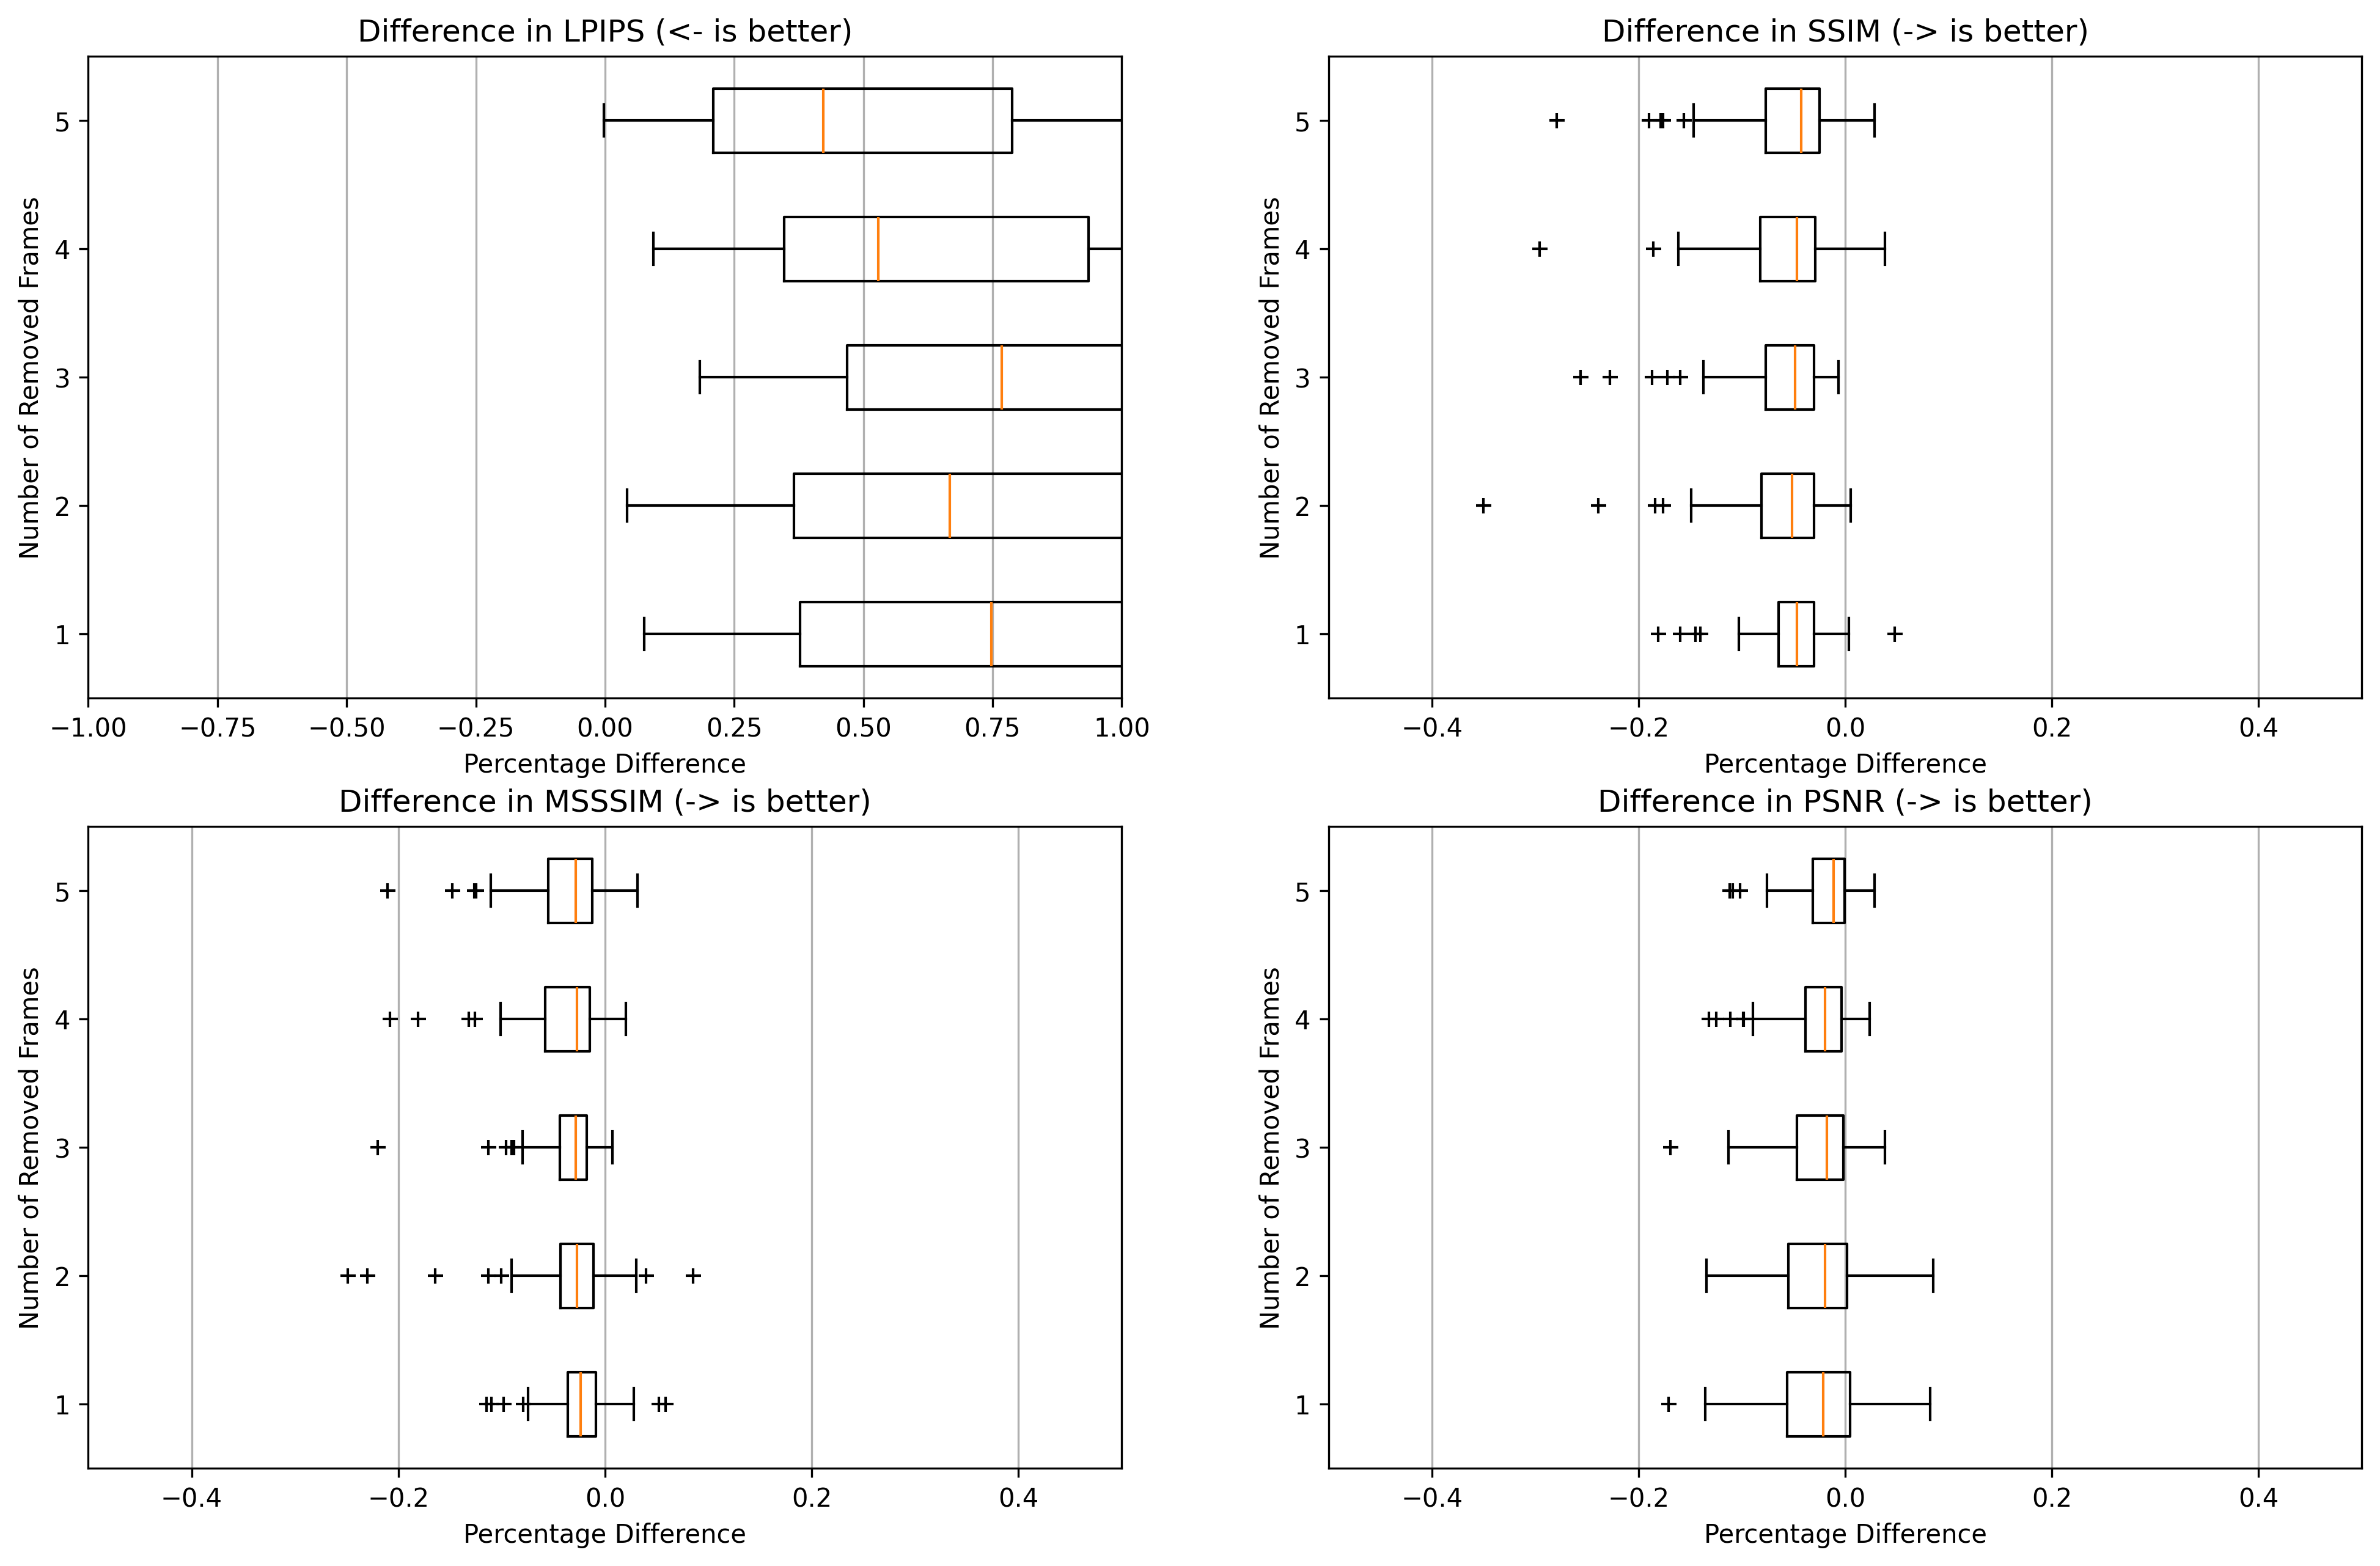

In [28]:
fig1, ax = plt.subplots(2, 2, figsize=(16,10))

lpips_bp = ax[0, 0].boxplot(lpips, notch=False, sym='+', vert=False, whis=1.5)
ax[0, 0].set_title('Difference in LPIPS (<- is better)')
ax[0, 0].set_xlabel('Percentage Difference')
ax[0, 0].set_ylabel('Number of Removed Frames')
ax[0, 0].xaxis.grid(True)
ax[0, 0].set_xlim(-1, 1)

ssim_bp = ax[0, 1].boxplot(ssim, notch=False, sym='+', vert=False, whis=1.5)
ax[0, 1].set_title('Difference in SSIM (-> is better)')
ax[0, 1].set_xlabel('Percentage Difference')
ax[0, 1].set_ylabel('Number of Removed Frames')
ax[0, 1].xaxis.grid(True)
ax[0, 1].set_xlim(-0.5, 0.5)

msssim_bp = ax[1, 0].boxplot(msssim, notch=False, sym='+', vert=False, whis=1.5)
ax[1, 0].set_title('Difference in MSSSIM (-> is better)')
ax[1, 0].set_xlabel('Percentage Difference')
ax[1, 0].set_ylabel('Number of Removed Frames')
ax[1, 0].xaxis.grid(True)
ax[1, 0].set_xlim(-0.5, 0.5)

ssim_bp = ax[1, 1].boxplot(psnr, notch=False, sym='+', vert=False, whis=1.5)
ax[1, 1].set_title('Difference in PSNR (-> is better)')
ax[1, 1].set_xlabel('Percentage Difference')
ax[1, 1].set_ylabel('Number of Removed Frames')
ax[1, 1].xaxis.grid(True)
ax[1, 1].set_xlim(-0.5, 0.5)

plt.show()

In [29]:
lpips = np.zeros((5), object)
ssim = np.zeros((5), object)
msssim = np.zeros((5), object)
psnr = np.zeros((5), object)

for i in range(5):
    lpips[i] = np.zeros(0, float)
    ssim[i] = np.zeros(0, float)
    msssim[i] = np.zeros(0, float)
    psnr[i] = np.zeros(0, float)

for i in range(num.shape[0]):
    lpips[removed_count[i]-1] = np.append(lpips[removed_count[i]-1], (float(tifi[i, 0]) - float(opti[i, 0])))
    ssim[removed_count[i]-1] = np.append(ssim[removed_count[i]-1], (float(tifi[i, 1]) - float(opti[i, 1])))
    msssim[removed_count[i]-1] = np.append(msssim[removed_count[i]-1], (float(tifi[i, 2]) - float(opti[i, 2])))
    psnr[removed_count[i]-1] = np.append(psnr[removed_count[i]-1], (float(tifi[i, 3]) - float(opti[i, 3])))

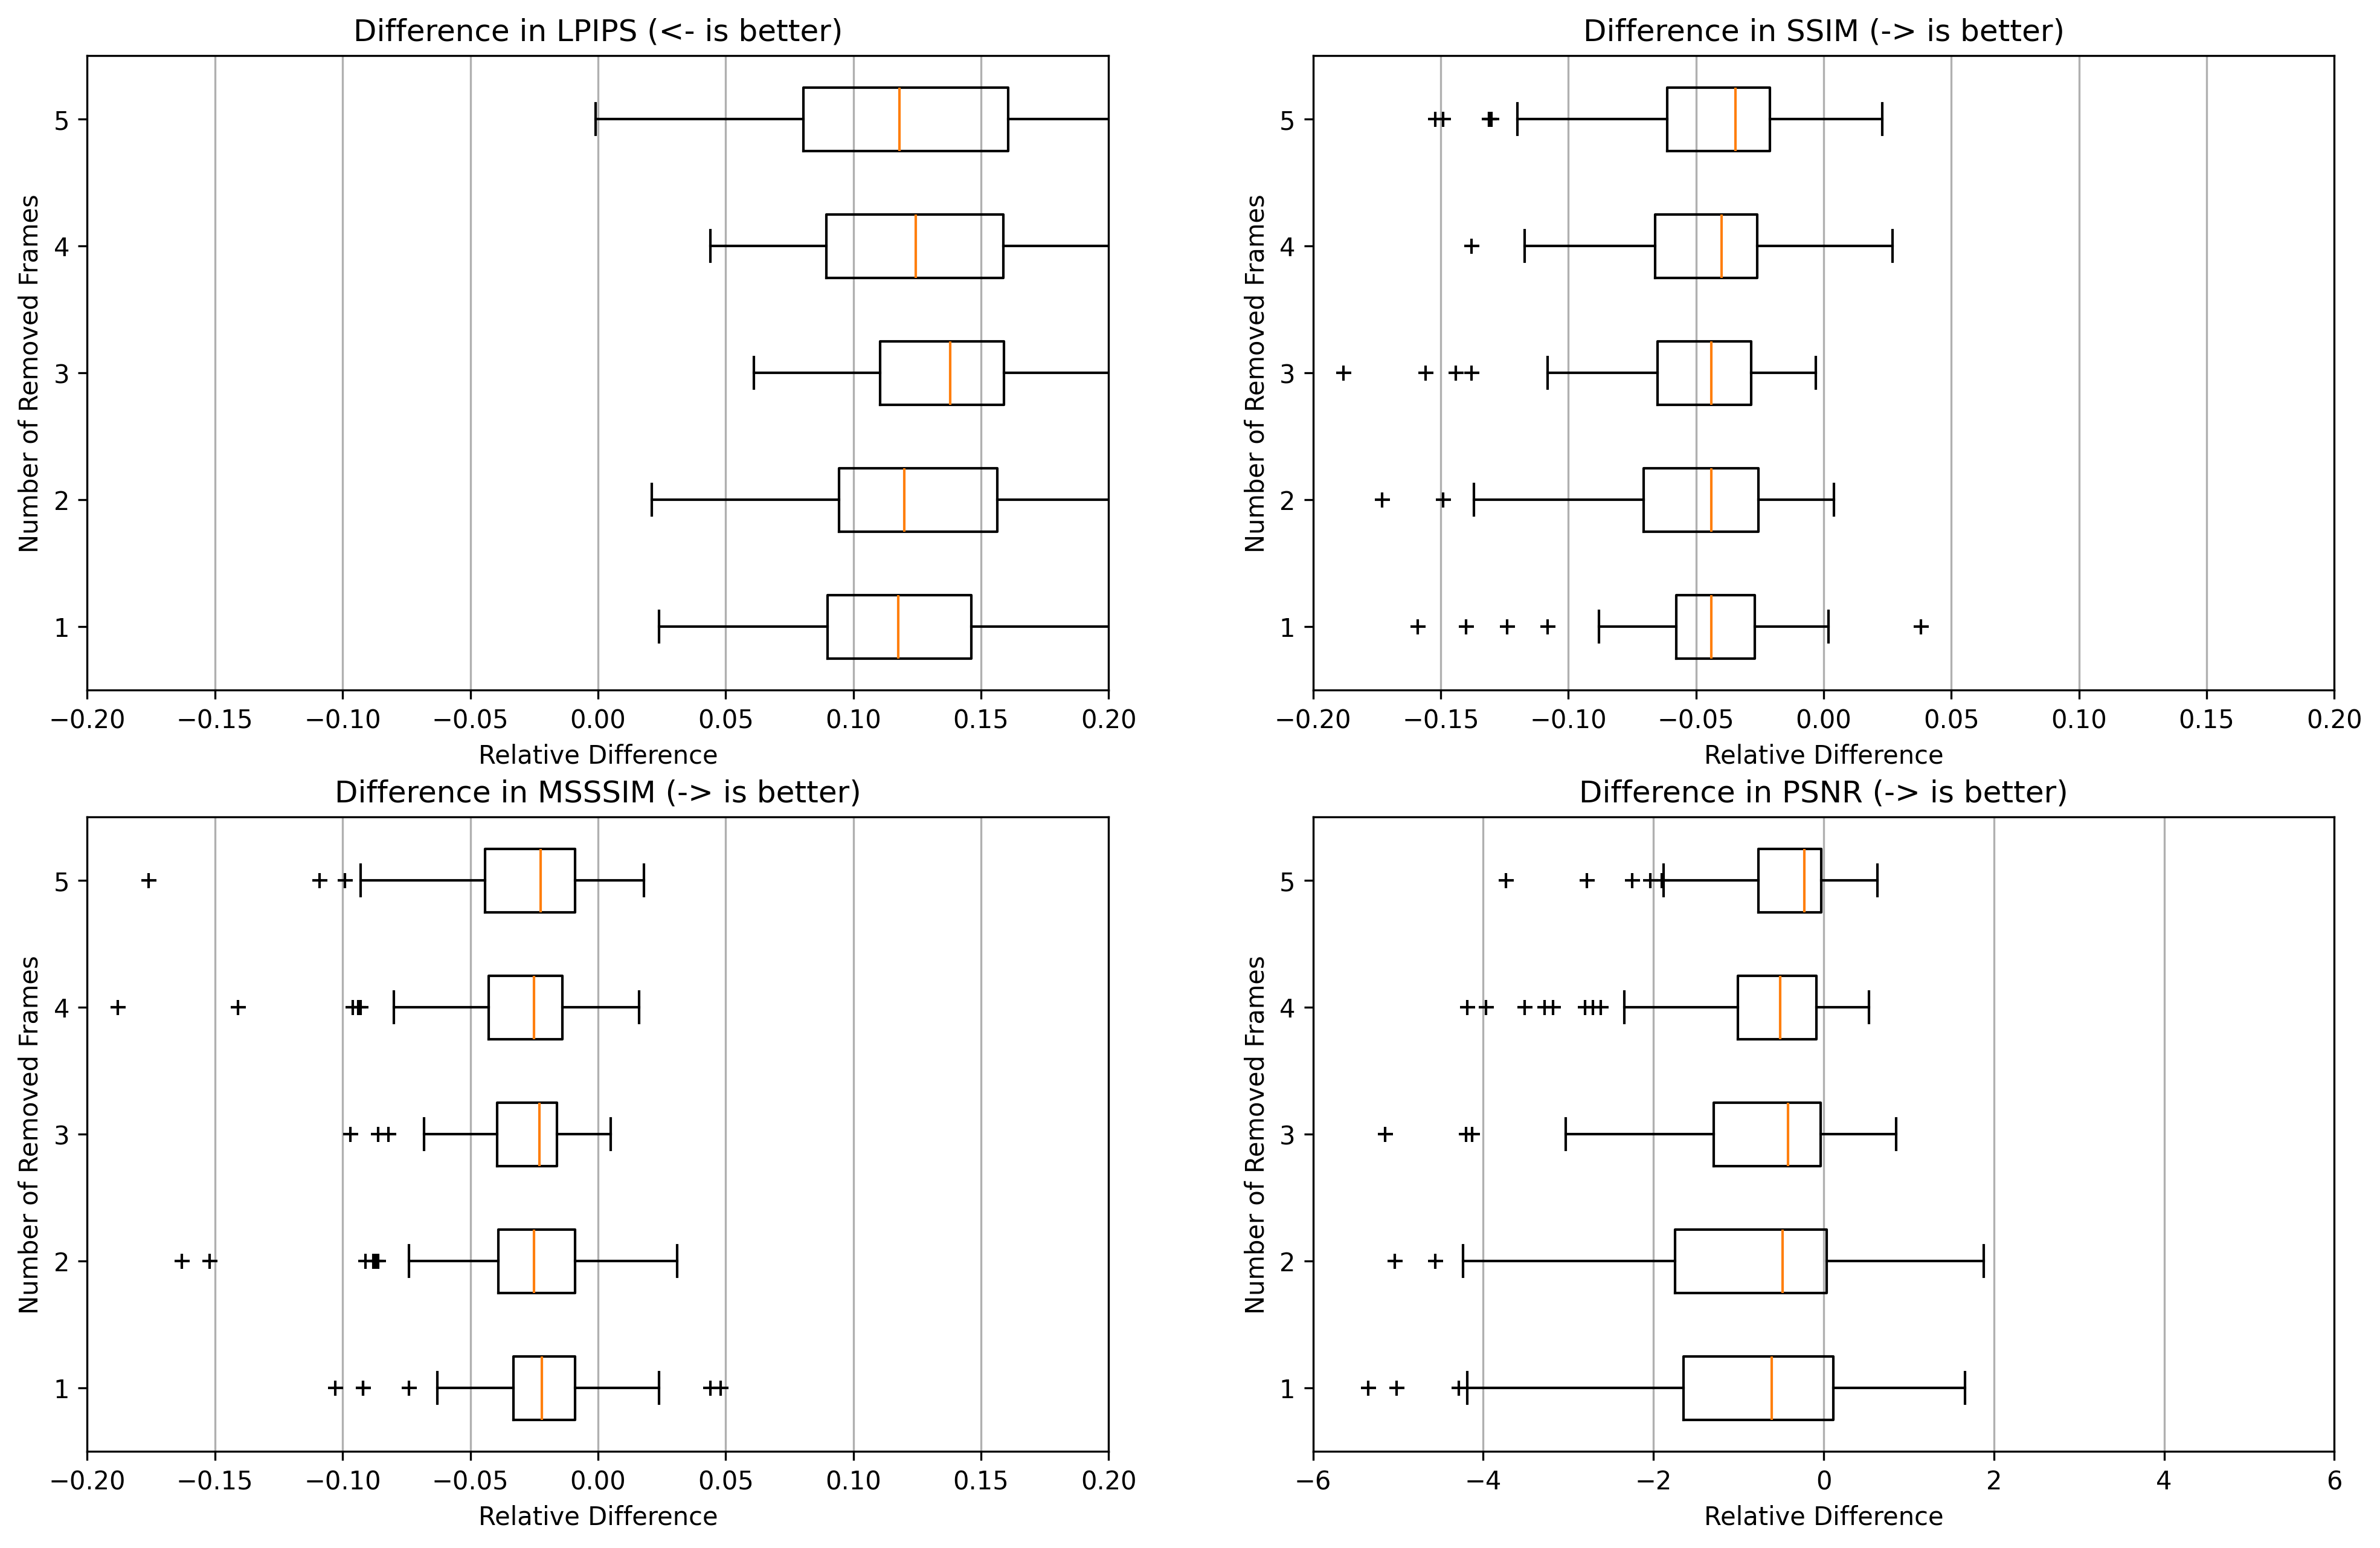

In [30]:
fig1, ax = plt.subplots(2, 2, figsize=(16,10))

lpips_bp = ax[0, 0].boxplot(lpips, notch=False, sym='+', vert=False, whis=1.5)
ax[0, 0].set_title('Difference in LPIPS (<- is better)')
ax[0, 0].set_xlabel('Relative Difference')
ax[0, 0].set_ylabel('Number of Removed Frames')
ax[0, 0].xaxis.grid(True)
ax[0, 0].set_xlim(-0.2, 0.2)

ssim_bp = ax[0, 1].boxplot(ssim, notch=False, sym='+', vert=False, whis=1.5)
ax[0, 1].set_title('Difference in SSIM (-> is better)')
ax[0, 1].set_xlabel('Relative Difference')
ax[0, 1].set_ylabel('Number of Removed Frames')
ax[0, 1].xaxis.grid(True)
ax[0, 1].set_xlim(-0.2, 0.2)

msssim_bp = ax[1, 0].boxplot(msssim, notch=False, sym='+', vert=False, whis=1.5)
ax[1, 0].set_title('Difference in MSSSIM (-> is better)')
ax[1, 0].set_xlabel('Relative Difference')
ax[1, 0].set_ylabel('Number of Removed Frames')
ax[1, 0].xaxis.grid(True)
ax[1, 0].set_xlim(-0.2, 0.2)

ssim_bp = ax[1, 1].boxplot(psnr, notch=False, sym='+', vert=False, whis=1.5)
ax[1, 1].set_title('Difference in PSNR (-> is better)')
ax[1, 1].set_xlabel('Relative Difference')
ax[1, 1].set_ylabel('Number of Removed Frames')
ax[1, 1].xaxis.grid(True)
ax[1, 1].set_xlim(-6, 6)

plt.show()